## Label image refinement
Similar to refining binary images it is also possible to refine label images. This notebook shows how to do this.

See also
* [scikit-image's Expand segmentation labels without overlap tutorial](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html)

In [1]:
import pyclesperanto_prototype as cle
from skimage.data import cells3d
import matplotlib.pyplot as plt
from skimage.morphology import closing, disk
from skimage.io import imread
from skimage.filters.rank import maximum
from skimage.segmentation import expand_labels
from skimage.measure import label
import numpy as np

As a starting point, let's assume an algorithm produced this label image.

cl.OCLArray([[ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       ...,
       [24, 24, 24, ..., 25, 25, 25],
       [24, 24, 24, ..., 25, 25, 25],
       [24, 24, 24, ..., 25, 25, 25]], dtype=uint32)
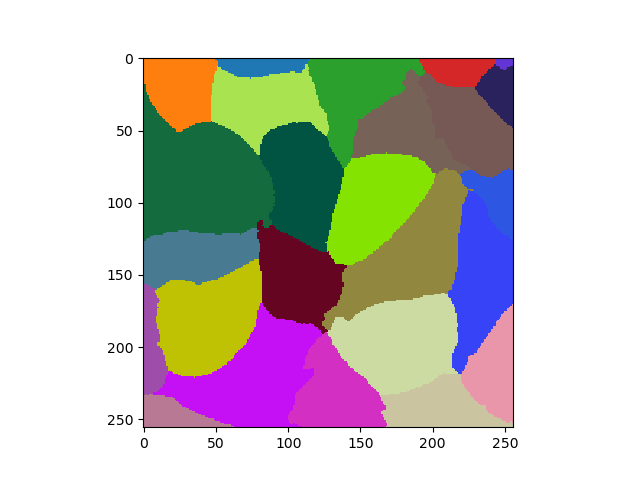

In [2]:
label_image = cle.asarray(imread("../../data/membrane_2d_labels.tif")).astype(np.uint32)
label_image

## Morphological opening labels
Similar to morphological opening on binary images, we can also modify this label image. Note: this operation introduces gaps between labels if the radius is large neough.

cl.OCLArray([[ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       ...,
       [24, 24, 24, ...,  0,  0,  0],
       [24, 24, 24, ...,  0,  0,  0],
       [24, 24, 24, ...,  0,  0,  0]], dtype=uint32)
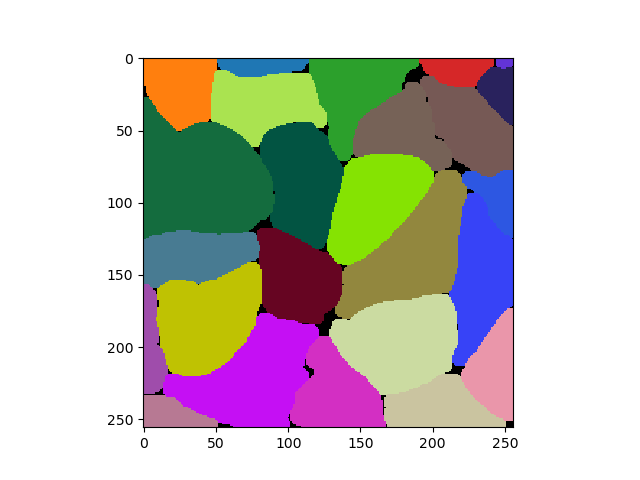

In [3]:
opened_labels = cle.opening_labels(label_image, radius=5)
opened_labels

## Smoothing labels
If these introduced gaps are not wanted, the alternative is to use this function:

cl.OCLArray([[ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       ...,
       [24, 24, 24, ..., 21, 21, 21],
       [24, 24, 24, ..., 25, 21, 21],
       [24, 24, 24, ..., 25, 25, 21]], dtype=uint32)
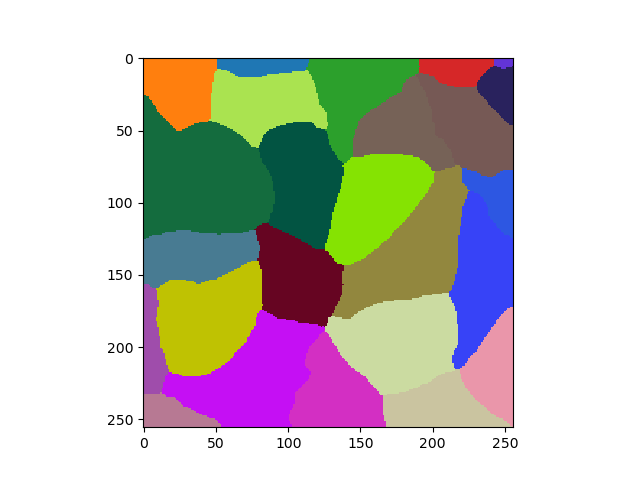

In [4]:
smoothed_labels = cle.smooth_labels(label_image, radius = 5)
smoothed_labels

To get a better understanding of what the algorithm does, it may make sense to tune the `radius` parameter interactively. This will not work in the github-rendering of this notebook, you need to run it in Jupyter lab and have [stackview](https://pypi.org/project/stackview/) installed.

In [5]:
import stackview
stackview.interact(cle.smooth_labels, label_image, continuous_update=True)

interactive(children=(IntSlider(value=0, description='radius', max=20), Output()), _dom_classes=('widget-inter…

## Eroding and dilating labels
Under the hood, the functions shown above use label erosion and dilation. These operations are defined analogously to binary erosion and dilation with the difference that labels cannot overwrite each other.

cl.OCLArray([[ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       ...,
       [24, 24, 24, ...,  0,  0,  0],
       [24, 24, 24, ...,  0,  0,  0],
       [24, 24, 24, ...,  0,  0,  0]], dtype=uint32)
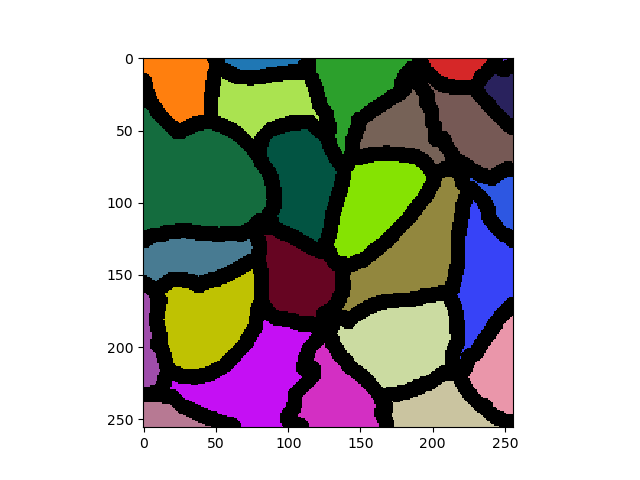

In [6]:
eroded_labels = cle.erode_labels(label_image, radius=5)
eroded_labels

cl.OCLArray([[ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       ...,
       [24, 24, 24, ...,  0,  0,  0],
       [24, 24, 24, ...,  0,  0,  0],
       [24, 24, 24, ...,  0,  0,  0]], dtype=uint32)
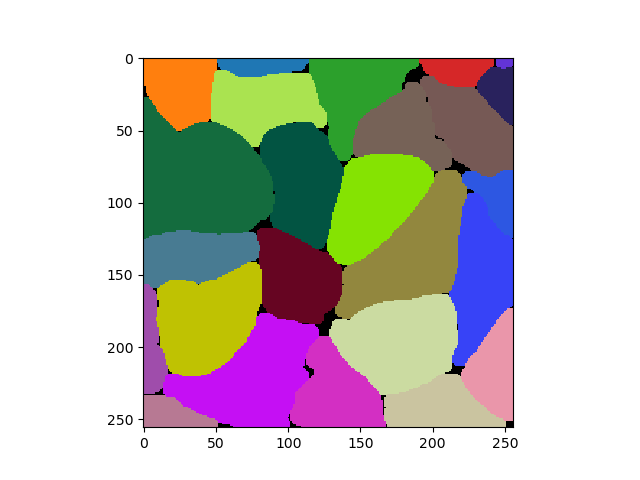

In [7]:
dilated_eroded_labels = cle.dilate_labels(eroded_labels, radius=5)
dilated_eroded_labels

## Exercise
Use labeling post-processing operations to modify this labeling result. Goal: Make small objects disappear while all other objects more or less keep their size and shape:

cl.OCLArray([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
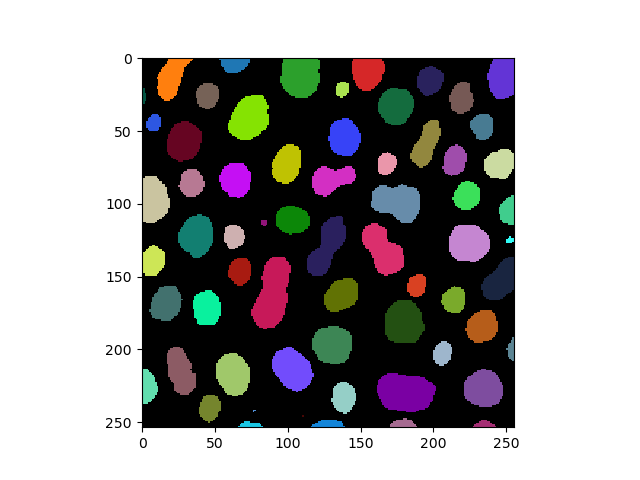

In [8]:
blobs_labels = cle.asarray(imread("../../data/blobs_labels.tif")).astype(np.uint32)
blobs_labels